In [5]:
from openforcefield.topology import Molecule, Topology
from openforcefield.typing.engines.smirnoff.forcefield import ForceField
from simtk import openmm, unit
import numpy
import matplotlib
import matplotlib.pyplot as plt

ff = ForceField('openff-1.0.0.offxml')

parameter = ff.get_parameter_handler('Bonds')

datafile = open('Bond_Data_extracted.txt', 'w+')

for bond in parameter.parameters:
    datafile.write(f'{bond.k}, {bond.length}, \n')
    print (bond) # ich wollte wissen was sonst noch so da drin steht.
     
datafile.close()

<BondType with smirks: [#6X4:1]-[#6X4:2]  length: 1.520375903275 A  k: 531.137373861 kcal/(A**2 mol)  id: b1  >
<BondType with smirks: [#6X4:1]-[#6X3:2]  length: 1.503004231651 A  k: 612.5097961064 kcal/(A**2 mol)  id: b2  >
<BondType with smirks: [#6X4:1]-[#6X3:2]=[#8X1+0]  length: 1.521605984526 A  k: 612.0537081219 kcal/(A**2 mol)  id: b3  >
<BondType with smirks: [#6X3:1]-[#6X3:2]  length: 1.459752099251 A  k: 568.1471787335 kcal/(A**2 mol)  id: b4  >
<BondType with smirks: [#6X3:1]:[#6X3:2]  length: 1.388664968947 A  k: 703.9196442458 kcal/(A**2 mol)  id: b5  >
<BondType with smirks: [#6X3:1]=[#6X3:2]  length: 1.372337637107 A  k: 857.1115548611 kcal/(A**2 mol)  id: b6  >
<BondType with smirks: [#6:1]-[#7:2]  length: 1.465648155674 A  k: 719.6326854584 kcal/(A**2 mol)  id: b7  >
<BondType with smirks: [#6X3:1]-[#7X3:2]  length: 1.387166824415 A  k: 719.219372554 kcal/(A**2 mol)  id: b8  >
<BondType with smirks: [#6X4:1]-[#7X3:2]-[#6X3]=[#8X1+0]  length: 1.442186178076 A  k: 764.71

In [4]:
import os
bondsfile = os.path.join('Bond_Data_extracted.txt')

tabelle = numpy.genfromtxt(fname=bondsfile, dtype='unicode')

print (tabelle [0:6, :])

[['531.137373861' 'kcal/(A**2' 'mol),' '1.520375903275' 'A,']
 ['612.5097961064' 'kcal/(A**2' 'mol),' '1.503004231651' 'A,']
 ['612.0537081219' 'kcal/(A**2' 'mol),' '1.521605984526' 'A,']
 ['568.1471787335' 'kcal/(A**2' 'mol),' '1.459752099251' 'A,']
 ['703.9196442458' 'kcal/(A**2' 'mol),' '1.388664968947' 'A,']
 ['857.1115548611' 'kcal/(A**2' 'mol),' '1.372337637107' 'A,']]


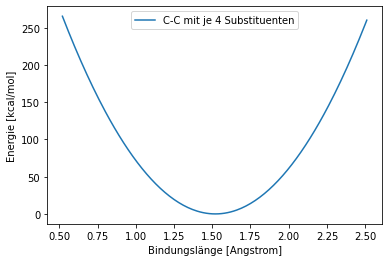

In [6]:
# Die erste Zeile der Tabelle bezieht sich auf eine C-C Bindung, 
# beide C-Atome haben 4 Substituenten.
# Bei der "Standardbindungslänge" l0 liegt das Energieminimum.

l_delta = numpy.arange(-1, 1, 0.01) 
k = tabelle[0,0].astype(numpy.float)
l0= tabelle[0,3].astype(numpy.float)
l = l0+l_delta
energy = (k/2)*((l-l0)**2)

plt.figure()
plt.plot(l, energy, label = 'C-C mit je 4 Substituenten')
plt.xlabel('Bindungslänge [Angstrom]')
plt.ylabel('Energie [kcal/mol]')
plt.legend()

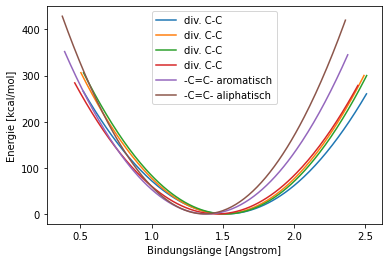

In [7]:
# Bei einem Overlay verschiedener C-C Bindungen zeigen sich geringe Unterschiede bei l0 und k.
# Hervorgehoben wurden hier zb. Doppelbindungen.
# Sie ist kürzer und rigider, Abweichungen von l0 sind mit steilerem Anstieg der Energie verbunden. 

plt.figure()
plt.xlabel('Bindungslänge [Angstrom]')
plt.ylabel('Energie [kcal/mol]')

for i in range (0,6):
    l_delta = numpy.arange(-1, 1, 0.01) 
    k = tabelle[i,0].astype(numpy.float)
    l0= tabelle[i,3].astype(numpy.float)
    l = l0+l_delta
    energy = (k/2)*((l-l0)**2)
   
    if i == 4:
        plt.plot(l,energy, label = '-C=C- aromatisch')
      
    elif i == 5:
        plt.plot(l,energy, label = '-C=C- aliphatisch')
        
    else:
        plt.plot(l,energy, label = 'div. C-C')
    
    plt.legend()

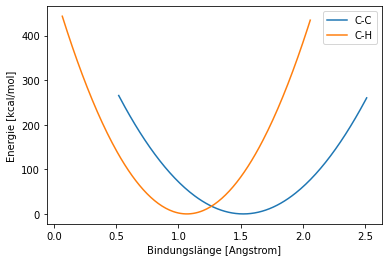

In [8]:
plt.figure()

# beim vergleich einer C-C mit einer C-H Bindung fallen größere Unterschiede auf.
# die C-H Bindung ist sowohl kürzer als auch rigider.

# C-C Bindung
l_delta = numpy.arange(-1, 1, 0.01) 
k = tabelle[0,0].astype(numpy.float)
l0= tabelle[0,3].astype(numpy.float)
l = l0+l_delta
energy = (k/2)*((l-l0)**2)
plt.xlabel('Bindungslänge [Angstrom]')
plt.ylabel('Energie [kcal/mol]')
plt.plot(l,energy, label = 'C-C')

# C-H Bindung
l_delta = numpy.arange(-1, 1, 0.01) 
k = tabelle[83,0].astype(numpy.float)
l0= tabelle[83,3].astype(numpy.float)
l = l0+l_delta
energy = (k/2)*((l-l0)**2)
plt.xlabel('Bindungslänge [Angstrom]')
plt.ylabel('Energie [kcal/mol]')
plt.plot(l,energy, label = 'C-H')

plt.legend()

Text(0, 0.5, 'PDF')

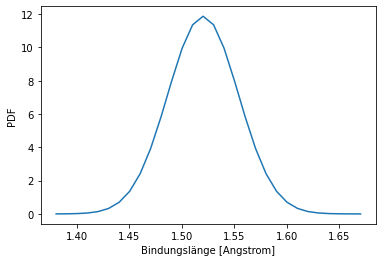

In [10]:
# Probability Density für eine C-C-Bindung mit je 4 Substituenten.
# Laut "Street-fighting statistical mechanics for biochemists" von John Chodera ist
# π (x) ∝ e^(−β*U(x))
# bzw. 
# π (x) ∝ e^(−β*K/2*x^2)
# Da es sich um eine Gaußverteilung handelt, darf man [...] annehmen:
# π(x) = 1/(((2*π)**0.5)*σ)*e**-(((x-µ)**2)/(2*(σ**2)))
# wobei σ = sqrt (kBT/K)

x = numpy.arange(-0.15, 0.15, 0.01) 

# die Grenzen wurden jetzt bewusst enger gewählt, 
# um die Form der Kurve zu verdeutlichen.

l0 = tabelle[0,3].astype(numpy.float)
l=l0-x
µ = 0
kBT = 0.6
K = tabelle[0,0].astype(numpy.float)
σ = (kBT/K)**0.5
e = 2.71828182845
π = 3.14159265359
πx = 1/(((2*π)**0.5)*σ)*e**-(((x-µ)**2)/(2*(σ**2)))

plt.figure ()
plt.plot (l, πx)
plt.xlabel ('Bindungslänge [Angstrom]')
plt.ylabel ('PDF')

In [ ]:
# man erkennt, dass die Bindungslänge selten mehr als 10 Angstrom 
# von l0 entfernt ist. Je näher an l0, desto wahrscheinlicher.

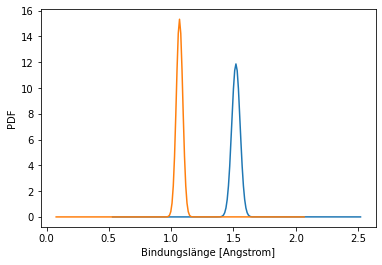

In [11]:
# Vergleich C-C mit C-H:

plt.figure ()
plt.xlabel ('Bindungslänge [Angstrom]')
plt.ylabel ('PDF')

x = numpy.arange(-1, 1, 0.01) 

l0 = tabelle[0,3].astype(numpy.float)
l=l0-x
µ = 0
kBT = 0.6
K = tabelle[0,0].astype(numpy.float)
σ = (kBT/K)**0.5
e = 2.71828182845
π = 3.14159265359
πx = 1/(((2*π)**0.5)*σ)*e**-(((x-µ)**2)/(2*(σ**2)))
plt.plot (l, πx,label='C-C')

l0 = tabelle[83,3].astype(numpy.float)
l=l0-x
µ = 0
kBT = 0.6
K = tabelle[83,0].astype(numpy.float)
σ = (kBT/K)**0.5
e = 2.71828182845
π = 3.14159265359
πx = (1/(((2*π)**0.5)*σ))*(e**-(((x-µ)**2)/(2*(σ**2))))

plt.plot (l, πx, label = 'C-H')

In [ ]:
# Die Beiden Bindungslängen unterscheiden sich deutlich,
# in der Realität werden sie nie ähnlich lang sein.
# Die C-C Bindung lässt auch etwas mehr Spielraum zu.
# Das liegt daran, dass die Federkonstante kleiner ist; 
# hier wird die Federkonstante durch sigma repräsentiert:
# je größer K, desto kleiner sigma, desta schmaler die Kurve.